## Фонин Максим Алексеевич, ИУ5-25М

## Лабораторная работа №3: Обработка признаков (часть 2)»

**Цель работы**

Изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

**Задание**

- Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  1. масштабирование признаков (не менее чем тремя способами);
  2. обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
  3. обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
  4. отбор признаков:
    * один метод из группы методов фильтрации (filter methods);
    * один метод из группы методов обертывания (wrapper methods);
    * один метод из группы методов вложений (embedded methods).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LassoCV
from scipy.stats import zscore

In [ ]:
# Загрузка датасета по инструкции kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "cleaned_nutrition_dataset_per100g.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "tharunmss/nutritional-breakdown-of-foods",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
df.shape

<ipython-input-2-72f17ee98517>:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 321k/321k [00:00<00:00, 1.21MB/s]


(3454, 13)

In [ ]:
df.head(10)

,Vitamin C (mg per 100g),Vitamin B11 (mg per 100g),Sodium (mg per 100g),Calcium (mg per 100g),Carbohydrates (g per 100g),food,Iron (mg per 100g),Calories (kcal per 100g),Sugars (g per 100g),Dietary Fiber (g per 100g),Fat (g per 100g),Protein (g per 100g),food_normalized
0,0.082,0.086,0.018,2.8,0.073,margarine with yoghurt,0.027,88.0,0.0,0.0,9.8,0.058,margarine with yoghurt
1,0.400,0.005,0.065,10.2,3.700,sunflower seed butter,0.700,99.0,1.7,0.9,8.8,2.800,sunflower seed butter
2,0.000,0.000,0.000,0.0,0.000,hazelnut oil,0.000,120.0,0.0,0.0,13.6,0.000,hazelnut oil
3,0.000,0.000,0.000,0.0,0.000,menhaden fish oil,0.000,1966.0,0.0,0.0,218.0,0.000,menhaden fish oil
4,0.000,0.000,0.000,0.0,0.000,cod liver fish oil,0.000,123.0,0.0,0.0,13.6,0.000,cod liver fish oil
5,0.000,0.000,0.000,0.0,0.000,sardine oil,0.000,123.0,0.0,0.0,13.6,0.000,sardine oil
6,0.000,0.000,0.000,0.0,0.000,cupu assu oil,0.000,120.0,0.0,0.0,13.6,0.000,cupu assu oil
7,0.000,0.000,0.000,0.0,0.000,lard,0.000,115.0,0.0,0.0,12.8,0.000,lard
8,0.000,0.002,0.031,153.6,3.800,sesame butter,3.100,94.0,0.0,0.9,8.1,2.900,sesame butter
9,0.000,0.067,0.019,0.6,0.100,margarine spread,0.078,59.0,0.0,0.0,6.7,0.082,margarine spread


## Масштабирование признаков

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

# MinMax
minmax_scaled = MinMaxScaler().fit_transform(df[numeric_cols])
df_minmax = pd.DataFrame(minmax_scaled, columns=numeric_cols)
print("MinMaxScaler result:\n", df_minmax.head())

# Standard
standard_scaled = StandardScaler().fit_transform(df[numeric_cols])
df_standard = pd.DataFrame(standard_scaled, columns=numeric_cols)
print("\nStandardScaler result:\n", df_standard.head())

# Robust
robust_scaled = RobustScaler().fit_transform(df[numeric_cols])
df_robust = pd.DataFrame(robust_scaled, columns=numeric_cols)
print("\nRobustScaler result:\n", df_robust.head())

MinMaxScaler result:
    Vitamin C (mg per 100g)  Vitamin B11 (mg per 100g)  Sodium (mg per 100g)  \
0                 0.000021                   0.000156              0.000001   
1                 0.000103                   0.000009              0.000005   
2                 0.000000                   0.000000              0.000000   
3                 0.000000                   0.000000              0.000000   
4                 0.000000                   0.000000              0.000000   

   Calcium (mg per 100g)  Carbohydrates (g per 100g)  Iron (mg per 100g)  \
0               0.002182                    0.000187            0.000223   
1               0.007947                    0.009482            0.005776   
2               0.000000                    0.000000            0.000000   
3               0.000000                    0.000000            0.000000   
4               0.000000                    0.000000            0.000000   

   Calories (kcal per 100g)  Sugars (g per 100

## Обработка выбросов

### Удаление выбросов (по Z-оценке)

In [ ]:
df.describe()

,Vitamin C (mg per 100g),Vitamin B11 (mg per 100g),Sodium (mg per 100g),Calcium (mg per 100g),Carbohydrates (g per 100g),Iron (mg per 100g),Calories (kcal per 100g),Sugars (g per 100g),Dietary Fiber (g per 100g),Fat (g per 100g),Protein (g per 100g)
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,9.501021,11.447140,141.437806,53.953960,18.724570,1.627954,227.591546,5.693513,2.157695,12.006807,10.819314
std,70.387542,33.849817,973.168394,103.339195,26.232674,4.384574,336.277025,13.136356,4.748876,26.726515,27.250089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029000,0.057000,4.647500,1.700000,0.200000,60.050000,0.000000,0.000000,0.500000,1.262500
50%,0.300000,0.075000,0.200000,21.940000,9.110000,0.700000,134.415000,0.920000,0.710000,4.105000,3.800000
75%,5.382500,4.327500,21.372500,60.600000,26.400000,1.600000,285.007500,5.207500,2.327500,12.500000,9.242500
max,3872.000000,550.520000,14174.590000,1283.500000,390.200000,121.200000,6077.000000,291.500000,76.500000,550.700000,560.300000


In [ ]:
import numpy as np
from scipy.stats import zscore

z_scores = zscore(df[numeric_cols])
mask = (np.abs(z_scores) < 3).all(axis=1)
df_new = df[mask]

In [ ]:
df_new.describe()

,Vitamin C (mg per 100g),Vitamin B11 (mg per 100g),Sodium (mg per 100g),Calcium (mg per 100g),Carbohydrates (g per 100g),Iron (mg per 100g),Calories (kcal per 100g),Sugars (g per 100g),Dietary Fiber (g per 100g),Fat (g per 100g),Protein (g per 100g)
count,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000
mean,6.756551,8.447258,44.566976,40.487177,15.233434,1.100794,181.385630,4.629093,1.618155,9.595538,8.184282
std,17.263650,19.585007,149.043711,55.243439,17.026146,1.549503,182.525743,8.170309,2.506267,15.692364,13.991322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.027000,0.055750,3.875000,1.600000,0.200000,55.000000,0.000000,0.000000,0.500000,1.100000
50%,0.300000,0.075000,0.200000,19.600000,8.700000,0.630000,122.000000,0.905000,0.655000,3.785000,3.455000
75%,4.640000,3.875000,16.707500,53.400000,23.940000,1.300000,243.030000,4.970000,2.100000,11.502500,7.900000
max,202.700000,112.650000,2511.990000,358.610000,95.400000,13.400000,1170.000000,44.830000,16.400000,91.100000,89.300000


### Замена выбросов (медианой, по IQR)

In [ ]:
import scipy.stats as stats

def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

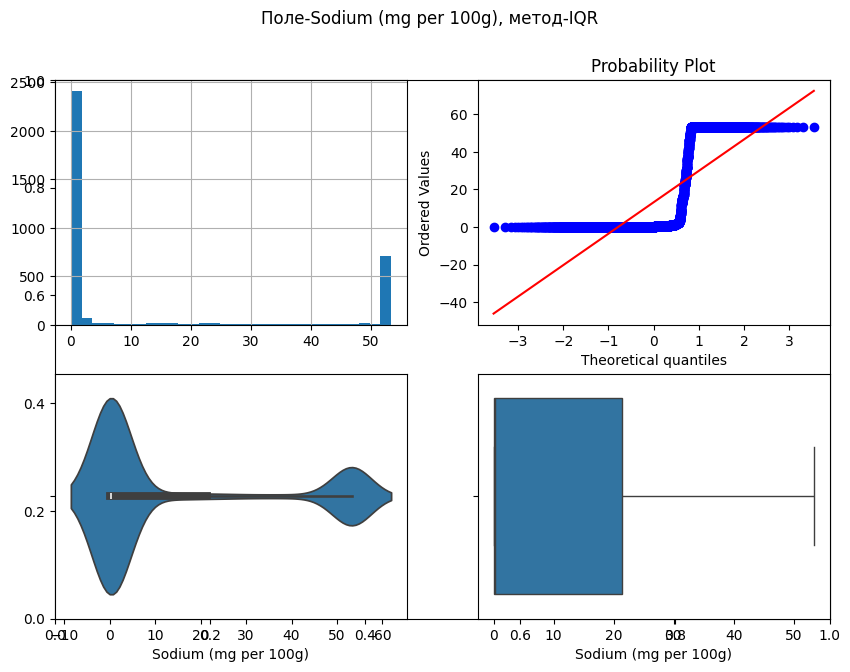

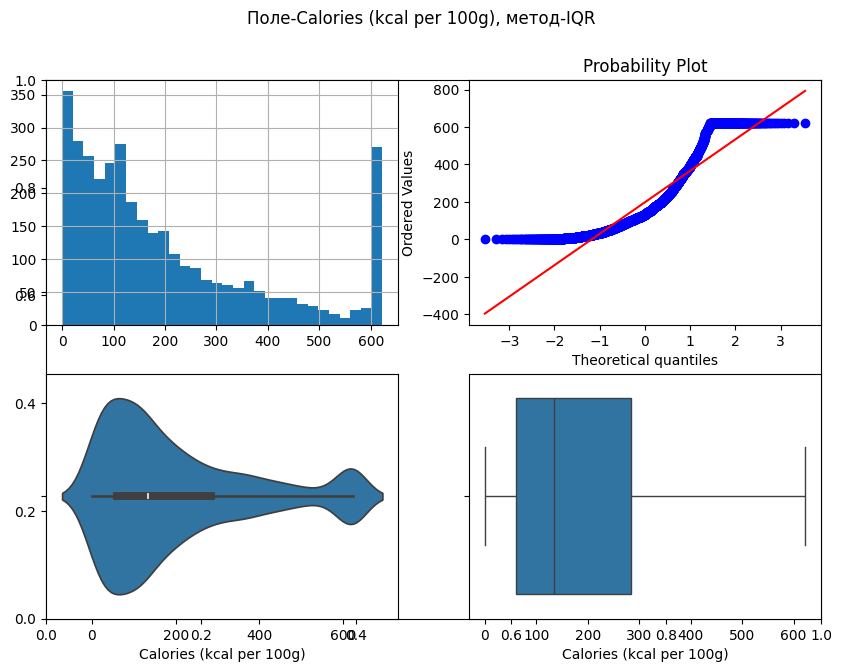

In [ ]:
cols = ["Sodium (mg per 100g)", "Calories (kcal per 100g)"]
df_iqr = df.copy()

for col in cols:
    # Вычисление верхней и нижней границы
    K2 = 1.5
    IQR = df_iqr[col].quantile(0.75) - df_iqr[col].quantile(0.25)
    lower_boundary = df_iqr[col].quantile(0.25) - (K2 * IQR)
    upper_boundary = df_iqr[col].quantile(0.75) + (K2 * IQR)
    # Изменение данных
    df_iqr[col] = np.where(df_iqr[col] > upper_boundary, upper_boundary,
                              np.where(df_iqr[col] < lower_boundary, lower_boundary, df_iqr[col]))
    title = 'Поле-{}, метод-{}'.format(col, "IQR")
    diagnostic_plots(df_iqr, col, title)

### Обработка нестандартного признака

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_text_processing = df.copy()

# Преобразуем текстовые данные (food) в числовые с помощью TF-IDF
vectorizer = TfidfVectorizer(max_features=10)  # Ограничиваем количество признаков
text_features = vectorizer.fit_transform(df_text_processing['food'])
df_text_features = pd.DataFrame(text_features.toarray(), columns=vectorizer.get_feature_names_out())

# Добавляем текстовые признаки в DataFrame
df_text_processing = pd.concat([df_text_processing, df_text_features], axis=1)

In [ ]:
df_text_processing.head()

,Vitamin C (mg per 100g),Vitamin B11 (mg per 100g),Sodium (mg per 100g),Calcium (mg per 100g),Carbohydrates (g per 100g),food,Iron (mg per 100g),Calories (kcal per 100g),Sugars (g per 100g),Dietary Fiber (g per 100g),...,beef,canned,cheese,chicken,cooked,ka,raw,sandwich,soup,with
0,0.082,0.086,0.018,2.8,0.073,margarine with yoghurt,0.027,88.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.400,0.005,0.065,10.2,3.700,sunflower seed butter,0.700,99.0,1.7,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.000,0.000,0.0,0.000,hazelnut oil,0.000,120.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.000,0.000,0.0,0.000,menhaden fish oil,0.000,1966.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.000,0.000,0.0,0.000,cod liver fish oil,0.000,123.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Отбор признаков

In [ ]:
  # Подготовка целевой переменной
bins = [-np.inf, 100, 200, np.inf]
labels = [0, 1, 2]  # метки классов

df['calorie_level'] = pd.cut(df['Calories (kcal per 100g)'], bins=bins, labels=labels)

X = df.drop(columns=['Calories (kcal per 100g)', 'calorie_level', 'food', 'food_normalized'])
y = df['calorie_level']

#### Метод фильтрации - корреляция

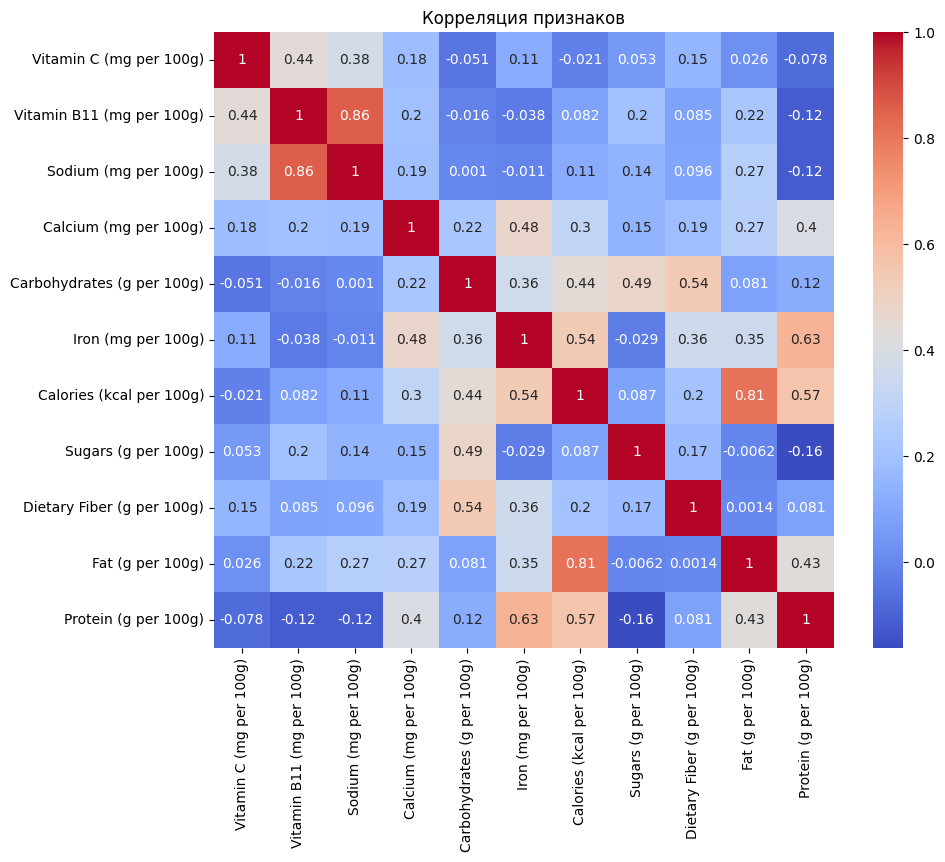

Топ признаков по корреляции с 'calories':
 Calories (kcal per 100g)      1.000000
Fat (g per 100g)              0.811671
Protein (g per 100g)          0.565734
Iron (mg per 100g)            0.535923
Carbohydrates (g per 100g)    0.442981
Name: Calories (kcal per 100g), dtype: float64


In [ ]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Корреляция признаков")
plt.show()

top_corr = correlation['Calories (kcal per 100g)'].abs().sort_values(ascending=False).head(5)
print("Топ признаков по корреляции с 'calories':\n", top_corr)

#### Метод обертывания - EFS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

# Масштабируем для KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Exhaustive Feature Selector
efs = EFS(knn,
          min_features=2,
          max_features=4,
          scoring='accuracy',
          print_progress=True,
          cv=5)

efs = efs.fit(X_scaled, y)

# Вывод результатов
print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)

Features: 375/375

Best accuracy score: 0.88
Best subset (indices): (4, 8, 9)


#### Метод вложений - линейная регрессия

Важность признаков (по абсолютным значениям коэффициентов):
Carbohydrates (g per 100g)    0.015173
Fat (g per 100g)              0.010353
Iron (mg per 100g)            0.006783
Protein (g per 100g)          0.003917
Dietary Fiber (g per 100g)   -0.003411
Vitamin B11 (mg per 100g)     0.001340
Sugars (g per 100g)          -0.001200
Calcium (mg per 100g)         0.000909
Vitamin C (mg per 100g)      -0.000436
Sodium (mg per 100g)         -0.000050
dtype: float64


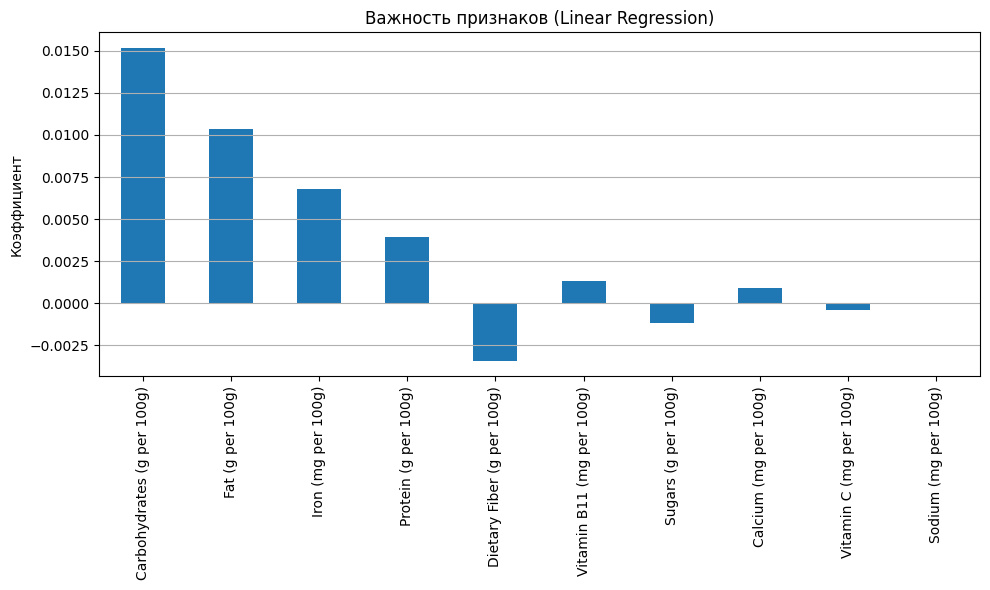

In [ ]:
from sklearn.linear_model import LinearRegression

# Обучим модель линейной регрессии
lr = LinearRegression()
lr.fit(X, y)

# Получим веса признаков
feature_importance = pd.Series(lr.coef_, index=X.columns).sort_values(key=np.abs, ascending=False)

# Вывод топ признаков
print("Важность признаков (по абсолютным значениям коэффициентов):")
print(feature_importance)

# Визуализация
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Важность признаков (Linear Regression)")
plt.ylabel("Коэффициент")
plt.grid(axis='y')
plt.tight_layout()
plt.show()